In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Thesis_Organized/Data

/content/drive/MyDrive/Thesis_Organized/Data


In [ ]:
!pip install pylabel

In [5]:
from pylabel import importer
import json
import cv2
import os
import matplotlib.pyplot as plt
import shutil

In [6]:
def mk_dir(dir_name, dir_path):
  if os.path.isdir(os.path.join(dir_path, dir_name)):
    print("directory already exists")
    if not os.path.isdir(dir_path):
      print("parent directory does not exists")
      return
  else:
    os.mkdir(os.path.join(dir_path, dir_name))

In [8]:
# create directories
mk_dir(dir_path = ".", dir_name = "Yolo_v5_Format")
mk_dir(dir_path = "./Yolo_v5_Format", dir_name = "Train")
mk_dir(dir_path = "./Yolo_v5_Format", dir_name = "Test")
mk_dir(dir_path = "./Yolo_v5_Format", dir_name = "Val")

directory already exists


In [9]:
dataset_train = importer.ImportCoco(path="/content/drive/MyDrive/Thesis_Organized/Data/COCO_Format/coco_train_data.json", path_to_images="/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Train")
dataset_test = importer.ImportCoco(path="/content/drive/MyDrive/Thesis_Organized/Data/COCO_Format/coco_test_data.json", path_to_images="/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Test")
dataset_val = importer.ImportCoco(path="/content/drive/MyDrive/Thesis_Organized/Data/COCO_Format/coco_val_data.json", path_to_images="/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Val")

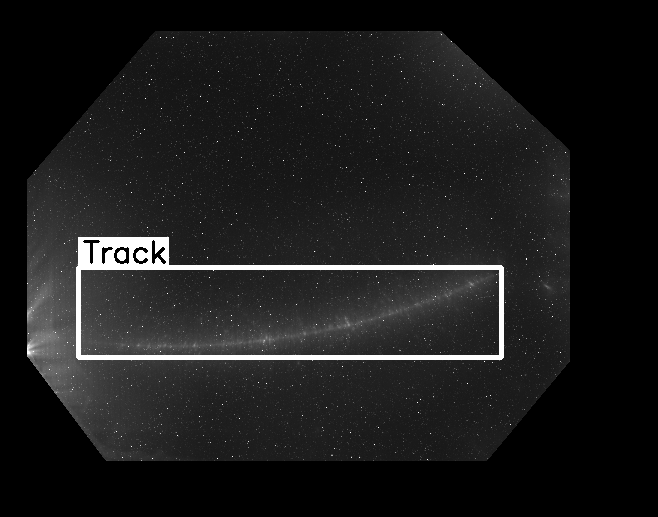

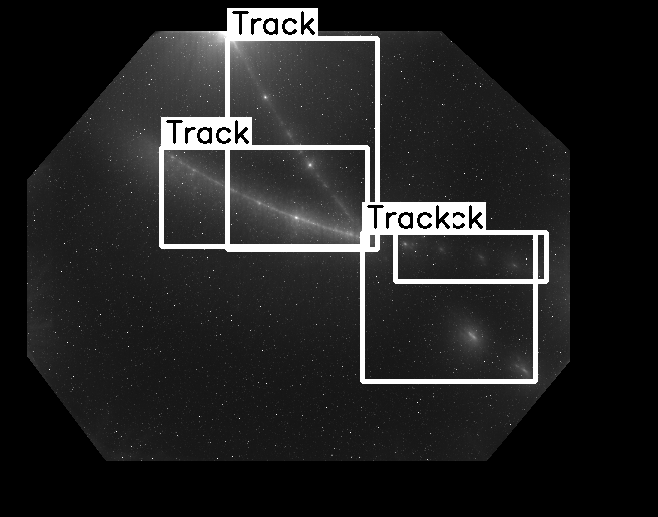

In [20]:
from IPython.display import Image, display
display(dataset_train.visualize.ShowBoundingBoxes(10))
display(dataset_train.visualize.ShowBoundingBoxes("L1Ap5_1-1-22.png"))

In [10]:
dataset_train.path_to_annotations = "/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Train"
training_labels = dataset_train.export.ExportToYoloV5(output_path = "/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Train", segmentation=True)
training_labels[:2]

Exporting YOLO files...: 100%|██████████| 791/791 [03:50<00:00,  3.43it/s]


['/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/dataset.yaml',
 '/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Train/L1Ap5_1-1-109.txt']

In [11]:
dataset_test.path_to_annotations = "/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Test"
testinglabels = dataset_test.export.ExportToYoloV5(output_path = "/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Test", segmentation=True)
testinglabels[:2]

Exporting YOLO files...: 100%|██████████| 98/98 [00:36<00:00,  2.67it/s]


['/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/dataset.yaml',
 '/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Test/L1Ap5_1-1-18.txt']

In [12]:
dataset_val.path_to_annotations = "/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Val"
testinglabels = dataset_test.export.ExportToYoloV5(output_path = "/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Val", segmentation=True)
testinglabels[:2]

Exporting YOLO files...: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]


['/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/dataset.yaml',
 '/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Val/L1Ap5_1-1-18.txt']

In [13]:
print(f"Number of images: {dataset_train.analyze.num_images}")
print(f"Number of classes: {dataset_train.analyze.num_classes}")
print(f"Classes:{dataset_train.analyze.classes}")
print(f"Class counts:\n{dataset_train.analyze.class_counts}")
print(f"Path to annotations:\n{dataset_train.path_to_annotations}")

Number of images: 791
Number of classes: 1
Classes:['Track']
Class counts:
Track    2402
Name: cat_name, dtype: int64
Path to annotations:
/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Train


In [15]:
print(f"Number of images: {dataset_val.analyze.num_images}")
print(f"Number of classes: {dataset_val.analyze.num_classes}")
print(f"Classes:{dataset_val.analyze.classes}")
print(f"Class counts:\n{dataset_val.analyze.class_counts}")
print(f"Path to annotations:\n{dataset_val.path_to_annotations}")

Number of images: 97
Number of classes: 1
Classes:['Track']
Class counts:
Track    309
Name: cat_name, dtype: int64
Path to annotations:
/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Val


In [16]:
print(f"Number of images: {dataset_test.analyze.num_images}")
print(f"Number of classes: {dataset_test.analyze.num_classes}")
print(f"Classes:{dataset_test.analyze.classes}")
print(f"Class counts:\n{dataset_test.analyze.class_counts}")
print(f"Path to annotations:\n{dataset_test.path_to_annotations}")

Number of images: 98
Number of classes: 1
Classes:['Track']
Class counts:
Track    286
Name: cat_name, dtype: int64
Path to annotations:
/content/drive/MyDrive/Thesis_Organized/Data/Yolo_v5_Format/Test
